In [3]:
import glob
result_files = glob.glob("results_postgres/*")
print(result_files)

['results_postgres/116.jsonl', 'results_postgres/0.jsonl', 'results_postgres/99.jsonl', 'results_postgres/128.jsonl', 'results_postgres/118.jsonl', 'results_postgres/80.jsonl', 'results_postgres/63.jsonl', 'results_postgres/105.jsonl', 'results_postgres/97.jsonl', 'results_postgres/112.jsonl', 'results_postgres/102.jsonl', 'results_postgres/88.jsonl', 'results_postgres/70.jsonl', 'results_postgres/106.jsonl', 'results_postgres/135.jsonl', 'results_postgres/64.jsonl', 'results_postgres/126.jsonl', 'results_postgres/84.jsonl', 'results_postgres/125.jsonl', 'results_postgres/108.jsonl', 'results_postgres/129.jsonl', 'results_postgres/81.jsonl', 'results_postgres/82.jsonl', 'results_postgres/123.jsonl', 'results_postgres/114.jsonl', 'results_postgres/69.jsonl', 'results_postgres/119.jsonl', 'results_postgres/131.jsonl', 'results_postgres/140.jsonl', 'results_postgres/141.jsonl', 'results_postgres/113.jsonl', 'results_postgres/78.jsonl', 'results_postgres/121.jsonl', 'results_postgres/60.js

In [4]:
import json
for result_file in result_files:
    with open(result_file, "r") as f:
        lines = f.readlines()
        for line in lines:
            result = json.loads(line)
            if result["exec_time"] >= 1000*60:
                print(result_file, result["exec_time"])


results_postgres/106.jsonl 77232.456
results_postgres/125.jsonl 417289.911
results_postgres/69.jsonl 60303.286
results_postgres/119.jsonl 1588276.921
results_postgres/121.jsonl 1532435.511
results_postgres/57.jsonl 2448436.041
results_postgres/107.jsonl 84083.136
results_postgres/67.jsonl 182314.331
results_postgres/134.jsonl 314420.487


In [9]:
import json
import numpy as np
result_avg = {}
result_std = {}
for result_file in result_files:
    qid = int(result_file.split('/')[1].split('.')[0])
    runtimes = []
    with open(result_file) as f:
        for line in f:
            result = json.loads(line)
            runtimes.append(result["exec_time"])
    runtime_avg = np.mean(runtimes)
    runtime_std = np.std(runtimes)
    result_avg[qid] = runtime_avg
    result_std[qid] = runtime_std


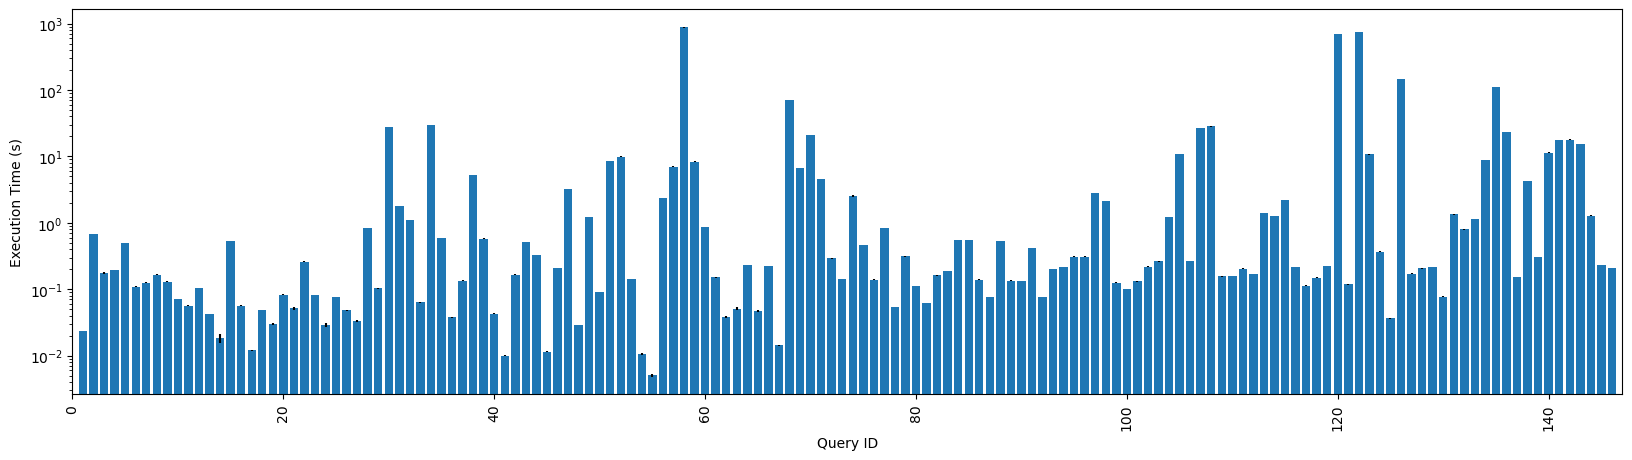

[[135, 1116.294746], [126, 1484.346028], [58, 8904.72556], [122, 7567.7624860000005], [120, 6954.738728]]


In [14]:
import matplotlib.pyplot as plt
# barplot of result_avg with error bar as result_std
fig, ax = plt.subplots(figsize=(20, 5))
x = sorted(list(result_avg.keys()))
y = [result_avg[k]/1000 for k in x]
yerr = [result_std[k]/1000 for k in x]
ax.bar(x, y, yerr=yerr)
ax.set_xlabel("Query ID")
ax.set_ylabel("Execution Time (s)")
ax.set_yscale('log')
ax.set_xlim(0, 147)
plt.xticks(rotation=90)
plt.show()

# find all the qid with execution time > 100s
qid_slow = [[k, result_avg[k]/100] for k in result_avg if result_avg[k] > 100000]
print(qid_slow)